<a href="https://colab.research.google.com/github/Nourhan-Adell/DeepLearning/blob/main/Exploring_Convolutions_inDetails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Here we explore the convulutional neural network model in detail of details (step by step)**

## **Import images**

In [1]:
from scipy import misc
ascent_image = misc.ascent()
# the image is found in a build in library

## **Draw the image by matplot library**

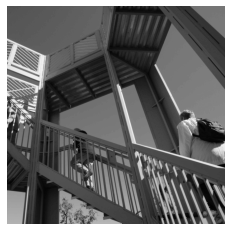

In [2]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [3]:
import numpy as np
# copy image to a numpy array
image_transformed = np.copy(ascent_image)   # thus to be able to deal with it in more deatils

#Get the dimensions of the image (matrx (size_x, size_y))
size_x = image_transformed.shape[0] 
size_y = image_transformed.shape[1]

## **Create a filter (3,3)**

In [4]:
filter =[[0,1,0],
         [1,-4,1],
         [0,1,0]]
         
weight =1

## **Construct the convolution**
 Here will apply this equation manually.. -_-
 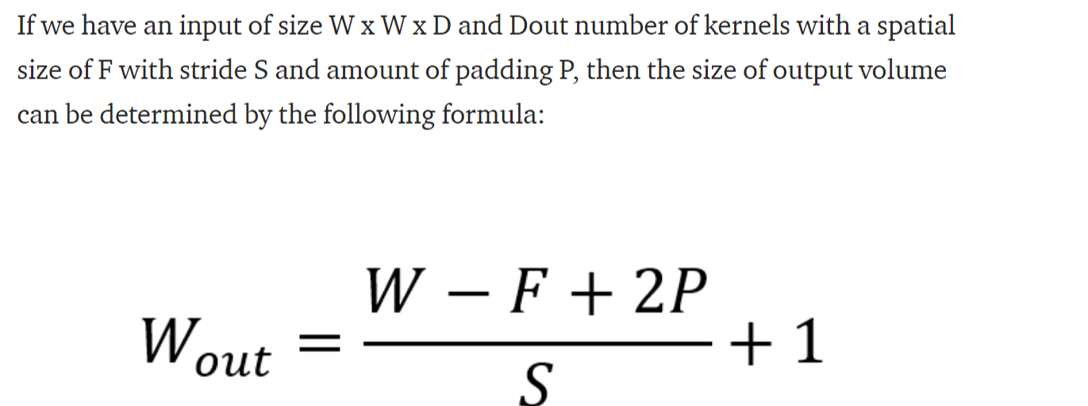




In [5]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

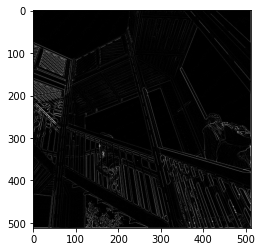

In [6]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

## **Effect of Max Pooling**
Here we will apply this equation manually too .. -_-
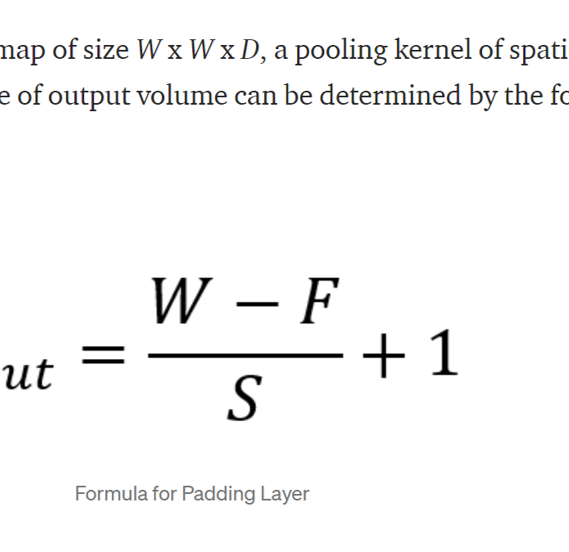

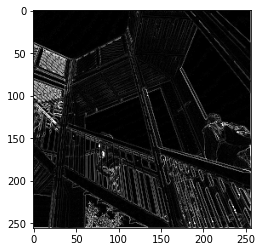

In [7]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      